In [1]:
files=["electron_520_1000eve.root", "gamma_520_1000eve.root", "muon_520_1000eve.root", "pi-_520_1000eve.root", "pi+_520_1000eve.root", "pi0_520_1000eve.root", "positron_520_1000eve.root", "proton_520_1000eve.root", "klong_520_1000eve.root"]


In [2]:
# import libraries
import uproot3 as uproot
import uproot as uproot4
import numpy as np
import numba
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)
import os,sys
#import pandas as pd
from scipy.stats import halfnorm
from sklearn.cluster import KMeans
import random
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from lmfit import Model
import copy
#import ROOT
#from coffea import hist

In [3]:
# Process Data
def getData(fname="", procName="Events"):
    kn_dict = uproot.open(fname)["Events"].arrays()
    kn_dict_ak1 = {name.decode(): ak.from_awkward0(array) for name, array in kn_dict.items()}
    kn_events = ak.zip({"Tracks":ak.zip({
                                        "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "truthtrack_x_st3":   kn_dict_ak1["truthtrack_x_st3"],
                                        "truthtrack_y_st3":   kn_dict_ak1["truthtrack_y_st3"],
                                        "truthtrack_z_st3":   kn_dict_ak1["truthtrack_z_st3"],
                                        "truthtrack_x_st1":   kn_dict_ak1["truthtrack_x_st1"],
                                        "truthtrack_y_st1":   kn_dict_ak1["truthtrack_y_st1"],
                                        "truthtrack_z_st1":   kn_dict_ak1["truthtrack_z_st1"],
                                        "truthtrack_x_vtx":   kn_dict_ak1["truthtrack_x_vtx"],
                                        "truthtrack_y_vtx":   kn_dict_ak1["truthtrack_y_vtx"],
                                        "truthtrack_z_vtx":   kn_dict_ak1["truthtrack_z_vtx"],
                                      }),
                        "RecoTracks":ak.zip({
                                      "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "track_x_CAL":   kn_dict_ak1["track_x_CAL"],
                                        "track_y_CAL":   kn_dict_ak1["track_y_CAL"],
                                        "track_pz":      kn_dict_ak1["track_pz_st3"],
                                        "track_px":      kn_dict_ak1["track_px_st3"],
                                        "track_py":      kn_dict_ak1["track_py_st3"],
                                        "track_x_st3":      kn_dict_ak1["track_x_st3"],
                                        "track_y_st3":      kn_dict_ak1["track_y_st3"],
                                        "track_z_st3":      kn_dict_ak1["track_z_st3"]
                                      }),
                        "Electrons":ak.zip({
                                            "ge":      kn_dict_ak1["ge"],
                                            "gvx":      kn_dict_ak1["gvx"],
                                            "gvy":      kn_dict_ak1["gvy"],
                                            "gvz":      kn_dict_ak1["gvz"],
                                            "gpx":      kn_dict_ak1["gpx"],
                                            "gpy":      kn_dict_ak1["gpy"],
                                            "gpz":      kn_dict_ak1["gpz"],
                                        }),
                        "Hits":ak.zip({
                                      "detID":   kn_dict_ak1["hit_detID"],
                                      "edep":    kn_dict_ak1["hit_edep"],
                                      "elmID":   kn_dict_ak1["hit_elmID"],
                                      "truthx":  kn_dict_ak1["hit_truthx"],
                                      "truthy":  kn_dict_ak1["hit_truthy"],
                                      "truthz":  kn_dict_ak1["hit_truthz"],
                                      "hit_pos":  kn_dict_ak1["hit_pos"],
                                      }),
                        "Cal_Position":ak.zip({
                                            "track_x_CAL":      kn_dict_ak1["track_x_CAL"],
                                            "track_y_CAL":     kn_dict_ak1["track_y_CAL"],
                                        }),
                        "St23_Tracklet":ak.zip({
                                        "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "st23tracklet_nhits_st1":   kn_dict_ak1["st23tracklet_nhits_st1"],
                                        "st23tracklet_nhits_st2":   kn_dict_ak1["st23tracklet_nhits_st2"],
                                        "st23tracklet_nhits_st3":   kn_dict_ak1["st23tracklet_nhits_st3"],
                                        "st23tracklet_px_st1":   kn_dict_ak1["st23tracklet_px_st1"],
                                        "st23tracklet_px_st3":   kn_dict_ak1["st23tracklet_px_st3"],
                                        "st23tracklet_py_st1":   kn_dict_ak1["st23tracklet_py_st1"],
                                        "st23tracklet_py_st3":   kn_dict_ak1["st23tracklet_py_st3"],
                                        "st23tracklet_pz_st1":   kn_dict_ak1["st23tracklet_pz_st1"],
                                        "st23tracklet_pz_st3":   kn_dict_ak1["st23tracklet_pz_st3"],
                                        "st23tracklet_x_st1":   kn_dict_ak1["st23tracklet_x_st1"],
                                        "st23tracklet_x_st3":   kn_dict_ak1["st23tracklet_x_st3"],
                                        "st23tracklet_x_CAL":   kn_dict_ak1["st23tracklet_x_CAL"],
                                        "st23tracklet_y_st1":   kn_dict_ak1["st23tracklet_y_st1"],
                                        "st23tracklet_y_st3":   kn_dict_ak1["st23tracklet_y_st3"],
                                        "st23tracklet_y_CAL":   kn_dict_ak1["st23tracklet_y_CAL"],
                                        "st23tracklet_z_st1":   kn_dict_ak1["st23tracklet_z_st1"],
                                        "st23tracklet_z_st3":   kn_dict_ak1["st23tracklet_z_st3"],  
                                        }),
                    
                       }, depth_limit=1)
    return kn_events

In [4]:
events_electron_520 = getData(files[0],"Events")
ENG = ak.flatten(events_electron_520['Electrons'].ge)


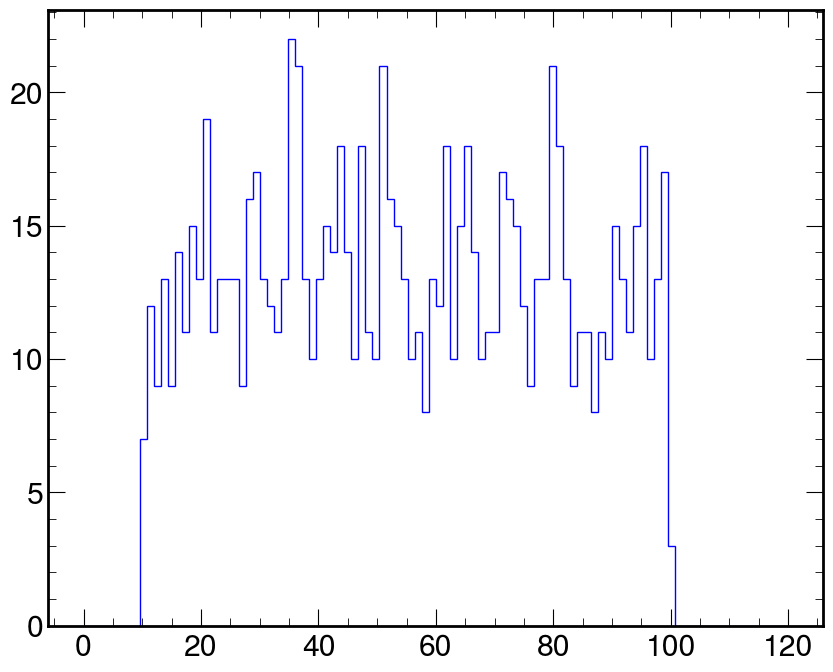

In [6]:

fig = plt.figure(figsize=(10,8))
plt.hist(ENG, bins=100, range=(0,120), histtype='step', density=False, color="blue")
plt.show()

In [9]:
ntowersx=72
ntowersy=36
sizex=5.53 # in cm
sizey=5.53 # in cm
ecalx=[-200,200] #size in cm
ecaly=[-100,100]
binsx=ecalx[1]- ecalx[0]
binsy=ecaly[1]- ecaly[0]
sfc = 0.1146337964120158 #sampling fraction of emcal
emin=0.0005

In [10]:
def emcal_simhit_selection(arr):
    mask = (arr.detID == 100)
    return mask

def emcal_simhit_selection_energy(arr, e):
    mask = (arr.edep >= e)
    return mask

def h2_selection(arr):
    mask = (arr.detID >= 35) & (arr.detID <= 38)
    return mask

def st2_selection(arr):
    mask = (arr.detID >= 13) & (arr.detID <= 18)
    return mask

def st3_selection(arr):
    mask = (arr.detID >= 19) & (arr.detID <= 30)
    return mask

def h4_selection(arr):
    mask = (arr.detID >= 41) & (arr.detID <= 46)
    return mask

In [16]:
def emcal_bytuple(file):
    dq_events = getData(file,"Events")
    eve_energy = []#designed to be 2D
    for i in range(len(dq_events[:]["Hits"].edep)):
        output=emcal_byevent(dq_events, i)
        eve_energy.append(output)
    return eve_energy

In [17]:
def emcal_byevent(dq_events,evtNum):
    dq_hits = dq_events[evtNum]["Hits"]
    # select emcal hits
    emcal_mask = emcal_simhit_selection(dq_hits)
    emcal_hits = dq_hits[emcal_mask]
    emcal_energy_mask = emcal_simhit_selection_energy(emcal_hits, emin)
    #convert into coordinates and energy_dp
    emcal_edep = emcal_hits.edep/sfc
    return emcal_edep

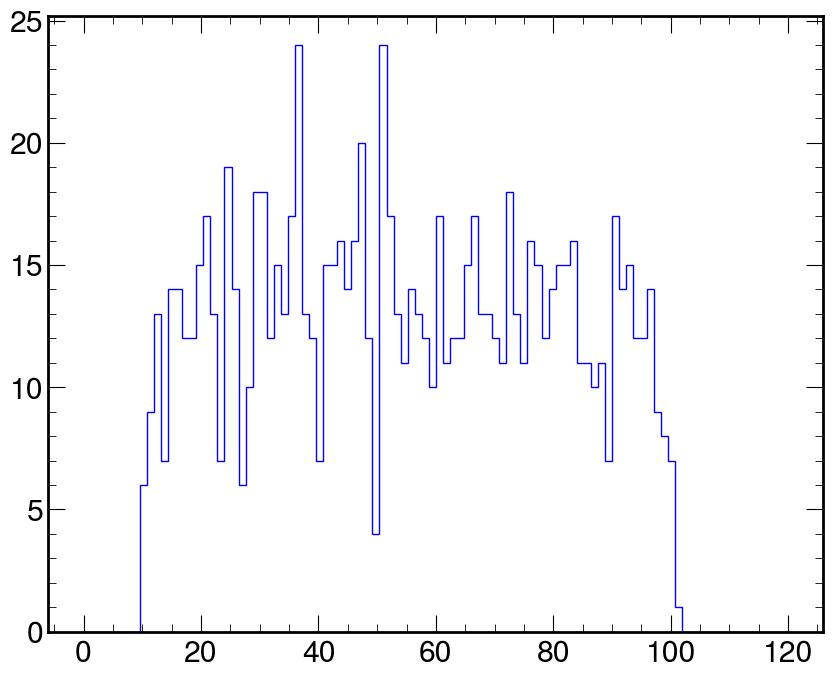

In [19]:
output=emcal_bytuple(files[0])
eng=[]
for i in range (len(output)):
    eng.append(sum(output[i]))
fig = plt.figure(figsize=(10,8))
plt.hist(eng, bins=100, range=(0,120), histtype='step', density=False, color="blue")
plt.show()